In [1]:
# Nama  : Avima Haamesha
# NIM   : 10219084

# Tugas 4



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./cubic_puzzle.jpg
gray (609, 622, 3)
gray2 (609, 622, 3)


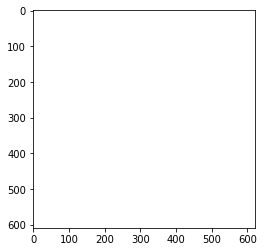

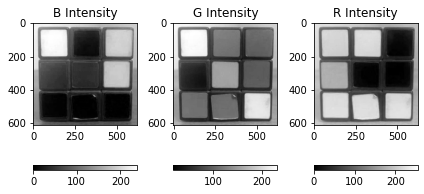

Done


In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

def cvt_gray(img, c_bgr=(0.114, 0.587, 0.299)):
    # create black img that have similar size to img
    w,h,c = img.shape
    img_gray = np.zeros( (w,h,c) )

    # extract 3 channel: bgr
    img_b, img_g, img_r = img[:,:,0], img[:,:,1], img[:,:,2]

    # convert bgr channel to gray
    for i in range(w):
        for j in range(h):
            img_gray[i,j]  = c_bgr[0] * img_b[i,j] \
                            + c_bgr[1] * img_g[i,j] \
                            + c_bgr[2] * img_r[i,j]
    
    # asign it to 3 channel in img_gray array
    return img_gray
    

def extract_color(frame, lower=[0,200,200], upper=[20,255,255]):
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    lower = np.array(lower)
    upper = np.array(upper)

    mask = cv.inRange(hsv, lower, upper)
    res = cv.bitwise_and(frame,frame, mask=mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    return res


def run_tugas04(path="mg06/cubic_puzzle.jpg"):
    # read img in rgb color space
    img = cv.imread(path)
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    grayku = np.zeros(shape=img.shape)
    for ch in range(img.shape[2]):
        grayku[:,:,ch] = gray
    print("gray", grayku.shape)
    plt.imshow(grayku, cmap="gray")

    gray2 = cvt_gray(img)
    print("gray2", gray2.shape)
    # cv.imshow("Blue Ch", img_b)
    # cv.imshow("Green Ch", img_g)
    # cv.imshow("Red Ch", img_r)
    # cv.imshow("Gray", gray2)
    plt.subplots(nrows=1, ncols=3, tight_layout=1)
    plt.subplot(1,3,1); plt.imshow(img[:,:,0], cmap="gray"); plt.title("B Intensity"); plt.colorbar(orientation="horizontal")
    plt.subplot(1,3,2); plt.imshow(img[:,:,1], cmap="gray"); plt.title("G Intensity"); plt.colorbar(orientation="horizontal")
    plt.subplot(1,3,3); plt.imshow(img[:,:,2], cmap="gray"); plt.title("R Intensity"); plt.colorbar(orientation="horizontal")
    plt.show()

    # cv.waitKey(0)
    # cv.destroyAllWindows()
    print("Done")

if __name__ == "__main__":
    folder_path = "./"
    path_arr = ["cubic_puzzle.jpg",
                "red_sample.jpg",
                "green_sample.jpg",
                "blue_sample.jpg"]
    path_arr = ["cubic_puzzle.jpg"]
    for i in range(len(path_arr)):
        path_arr[i] = os.path.join(folder_path, path_arr[i])
        print(path_arr[i])
        run_tugas04(path_arr[i])